#### My example with unique code and different sequences from taught course

In [1]:
#Sequence Alignment between COVID sequence and Influenza B sequence

#COVID sequence: 
#NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
#https://www.ncbi.nlm.nih.gov/nuccore/1798174254

#Influenza B sequence:
#NC_002204.1 Influenza B virus RNA 1, complete sequence
#https://www.ncbi.nlm.nih.gov/nuccore/NC_002204

In [2]:
import biotite.sequence as seq                    #required for sequence
import biotite.database.entrez as entrez          #required for database extraction
import biotite.sequence.io.fasta as fasta         #required for file type  
import biotite.sequence.align as align            #required for alignment
import biotite.sequence.graphics as graphics      #Better format for align graphs 
import matplotlib.pyplot as plt                   #required to plot graphs
import seaborn as sns                             #Plots better-looking graphs
sns.set()                                         #Overwrites matplotlib code for sns style 

In [3]:
# Querying covid and influenza files from NCBI using Locus number
covid_file = entrez.fetch("NC_045512","myresult_dir",db_name="nuccore",ret_type="fasta",suffix ="fa")
influenzaB_file = entrez.fetch("NC_002204","myresult_dir",db_name="nuccore",ret_type="fasta",suffix="fa")

In [4]:
#Read files - not running files to limit processing time, especially the covid file
c_file = fasta.FastaFile.read(covid_file)
i_file = fasta.FastaFile.read(influenzaB_file)

In [5]:
#Isolating just the sequence
for topline,sequence in c_file.items():
    covid_seq = seq.NucleotideSequence(sequence)
    
for topline,sequence in i_file.items():
    influenzaB_seq = seq.NucleotideSequence(sequence)

In [6]:
#Bases frequency - COVID
covid_freq = covid_seq.get_symbol_frequency()
covid_freq

{'A': 8954, 'C': 5492, 'G': 5863, 'T': 9594}

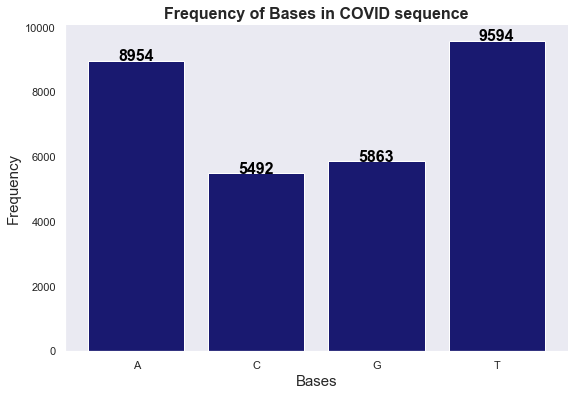

In [7]:
#Plotting Frequency - COVID 
sns.set_style("dark") #dark background behind graph
plt.figure(figsize = (9,6))
plt.bar(covid_freq.keys(),covid_freq.values(),color="midnightblue")

#Gets the bases frequencies above the bars
for X,Y in enumerate(covid_freq.values()):
    plt.annotate(Y,xy=(X,Y),ha="center",color="black",fontsize=16,fontweight="bold")

plt.title("Frequency of Bases in COVID sequence",fontsize=16,fontweight="bold")
plt.ylabel("Frequency",fontsize=15)
plt.xlabel("Bases",fontsize=15)
sns.despine() #No grid lines, looks cleaner
plt.show()

In [8]:
#Bases frequency - Influenza B
IfluB_freq = influenzaB_seq.get_symbol_frequency()
IfluB_freq

#Clear that this is not a complete DNA sequence given the differrence bewtween A and T bases

{'A': 864, 'C': 402, 'G': 525, 'T': 577}

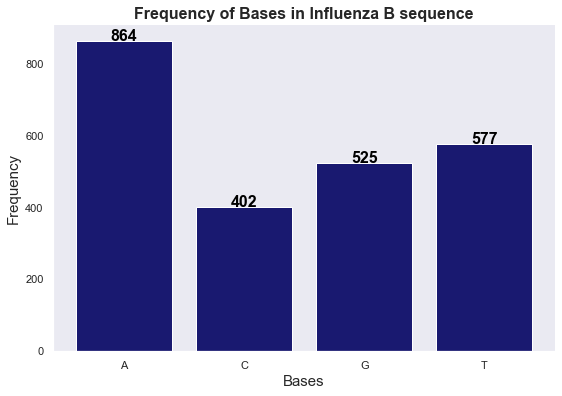

In [9]:
#Plotting Bases - Influenza B
sns.set_style("dark")
plt.figure(figsize = (9,6))
plt.bar(IfluB_freq.keys(),IfluB_freq.values(),color="midnightblue")

for X,Y in enumerate(IfluB_freq.values()):
    plt.annotate(Y,xy=(X,Y),ha="center",color="black",fontsize=16,fontweight="bold")

plt.title("Frequency of Bases in Influenza B sequence",fontsize=16,fontweight="bold")
plt.ylabel("Frequency",fontsize=15)
plt.xlabel("Bases",fontsize=15)
sns.despine()
plt.show()

In [10]:
#Isolating the first 500 bases of each sequence for better looking graphs and lower processing speed
#In theory, this could be used to analyse promoter regions between two sequences 
covid_seq1 = covid_seq[0:500]
influenzaB_seq1 = influenzaB_seq[0:500]

In [11]:
#creating matrix
nuc_matrix = align.SubstitutionMatrix.std_nucleotide_matrix()

In [12]:
#aligning
seq_align = align.align_optimal(covid_seq1,influenzaB_seq1,nuc_matrix)

In [13]:
print(seq_align[0])

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCA-ACTTTCGATCTCTTGTA-G-ATCTGTTCTCT
AGCAGAAGCGGAG-CTTTAAGATG-AATATAA-ATCCATATTTTCTTT-TCATAGATGTACCTATACAGG

AAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGC-TGCATGCTTAGTG-CACTCA-CGCAGTATAAT-
CAGC-AATTTCAACAACA-T-TCCCATACAC-CGGTGTTCCCCCTTATTCTCATGGAACGG-GAACAGGC

TA-ATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGT-CTATCTTCTGCAGG-C-TG-CTTACG
TACACAA-TAGACACCGTGATT-AGAACACACGAGTA-CTCAAACAAGGGAAAACAATACATTTCTGATG

GTTTC-GTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGG-GTG--TGA-CCGAAAGG-T
-TTACAGGATGTGTAATGGTAGATC--CAACAAATGGGCCATTAC-CCGAAGACAATGAACCGAGTGCCT

AAGATGGAGAGCCTTGTCC-CTGGTTTCAACG-AGAAAACACACGTCCAAC-TC-AGTTTGCCTGTTTTA
ATGCACAATTGGATTGTGTTCTGGAGGCTTTGGATAGAATGGATGAAGAACATCCAGGT--C-TGTTTCA

--CAGGTTCGC-GACGTGCTCGTACGTGGCT-T--TGGAGACTCC-GTGGAGGAGGTCTTA-TCAGAGGC
AGCAGGGTCACAGAA-TGC-CATG-GAGGCACTAATGGTCACAACAGTGGACAAA-T-TGACTCAGGGG-

ACGTCAACATCTTAAAGATGG-CACT-TGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTG
A-GACAG-ACCTTTGAT-TGGACGGTGTGTAGAAACCAACCTGCTGCAAC-GGCACTGAACA-CAACAAT


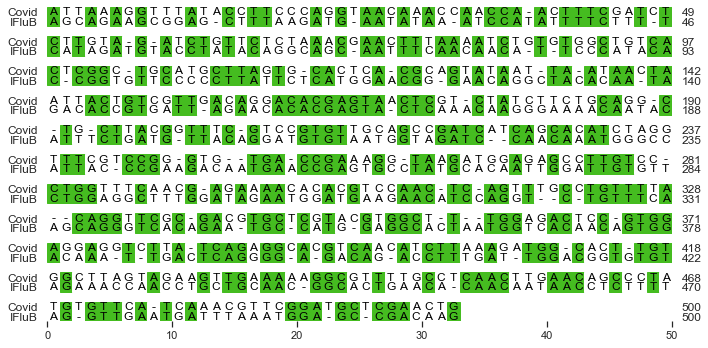

In [14]:
#Aligning sequences in a nicer format
fig = plt.figure(figsize=(10,5))
sp = fig.add_subplot(111)
graphics.plot_alignment_similarity_based(
    sp,seq_align[0], matrix=nuc_matrix, labels=["Covid", "IFluB"],
    show_numbers=True, show_line_position=True
)
fig.tight_layout()
plt.show()

In [15]:
#Calculates sequence idenitity
align.get_sequence_identity(seq_align[0])

0.5028142589118199

In [16]:
#Calculates similarity score of an alignment
seq_align[0].score

-116